# Academia Vigara

## Introduction

<img src="https://gestor.acaker.com/storage/img/A4HbpS4NZ2M89DebuTBxGl3KE1DoYRAzszQG3tHf.png" width="40%" style="align: center;">

Academia Vigara is a Small Company founded in 2016 with the main aim of helping every family with the exams in high school and univeristy.

### History
To introduce a bit the story of the company i will detail you some oof the most important hints:

- **nov-2016:** The first Academia Vigara was opened. It had 40 $m^2$
- **sep-2017:** We change venue to have more space to the closest free local.
- **2018:**
    - We open a seconda academy in Alcorcón.
    - We sign two contrats in Fenlabrada.
    - We manage the no-formal education in Alcorcón TownHall
- **2019:** 
  - We transform the entire company and start I create **_acaKER_**.
  - We close our venues in Fuenlabrada owing to national regulations of our goverment.
- **2020:** Thanks to COVID que enlarge our e-teaching team and improve the acaKER department.
- **2021:** We opened a new venue in Leganés.

Currently there are three different venues where you can become an Academia Vigara Student on top of the online classes.

| Alcorcón Castillos | Alcorcón Valderas  | Leganés |
|:--|:--| :--|
| <img src="https://web.academiavigara.com/img/fachada_castillos.jpg" width="400px">|<img src="https://web.academiavigara.com/img/fachada_languages.jpg" width="400px">|<img src="https://web.academiavigara.com/img/Fachada_esquina.jpeg" width="400px"> |


if you are interested in knowing more things about the academy or the company, you can visit its website just by clicking in the following link: [website of the academy](https://academiavigara.com/)


<div style="background: yellow; padding-top: 20px; padding-bottom: 20px; text-align: center; margin-top: 60px;">
    <h3>Important notice</h3>
    All the data use in this notebook is <b>fake</b>. The database we are connecting has been created only for educational porpuoses. 
    Any similarity with the real life would be an absolute coincidence.
</div>




## Importing data

First of all we need to obtain the data from a database where the business is working. For that I am going to create a **Class** that will help uss managing later the querys we make to the data base to manage teh information easily and without reapiting the code.

For that we have to import some libraries and create the class as it can be seen below:

In [2]:
import pymysql
import pandas as pd

class DB():
    
    def __init__(self):
        self.conn=pymysql.connect(host='127.0.0.1',port=int(3306),user='root',passwd='',db='acaKER')
        
    
    def query(self, query):
        df=pd.read_sql_query(query,self.conn)
        return df;
    
    def querydict(self, query):
        df=pd.read_sql_query(query,self.conn)
        return df.to_dict('records')
    
    def querylist(self, query, column):
        df=pd.read_sql_query(query,self.conn)
        return df[column].to_list()

To check everything is working properly, we are going to check the number of students that the academy had for the last 12 months and we will plot it in a simple graph:

In [3]:
ask = ' SELECT YEAR(created_at) as ano, COUNT(Distinct alumno_id) as alumnos FROM detalle WHERE YEAR(created_at)>2016 GROUP BY YEAR(created_at) ORDER BY YEAR(created_at) ASC '

students = DB()
table = students.query(query = ask)
dic = students.querydict(query = ask)
print(table)

    ano  alumnos
0  2019      518
1  2020      861
2  2021     1111


To have a better view of the data, I would like to have a graph where we can check the evolution of the number of sstudents.

That is why we are going to import some libraries that will help in this task.

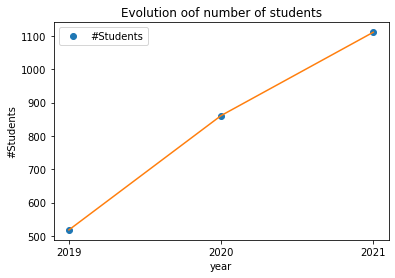

In [4]:
import matplotlib.pyplot as plt
import numpy as np

anos = np.array( table['ano'] )
alumnos = np.array( table['alumnos'] )

plt.plot(anos,alumnos, 'o')
plt.plot(anos,alumnos,)
plt.title("Evolution oof number of students")
plt.xticks(np.arange(min(anos), max(anos)+1, 1.0))
plt.xlabel("year")
plt.ylabel("#Students")
plt.legend(["#Students"])
plt.show()

Just from watching the plot, we can easily draw that the growth of the number of students is linear in the last 3 years so it would be easy to have an stimation of the number of students that there will be in the following year.

## Objective

This notebook will try to solve several mathematical problems that appears in the daily task of the managers of the academy so it can be used as a tool for them to take more concious decisions. Ideally this decisions will become into better results for the company.

- Get and stimations of the number of the students that the academy will have in 2022 using the current data.
- Get an stimation of the current month income in a certain day of the month using the temporality factor.
- Have a simple dashboard where the managers can retrive some data.

For this we will define classes and functions that will help doing the maths behind this calculations and we will plot all the results for a better understanding.

---

## Students in 2022

To stimate the number of students in the following year since we had realised that the data follows a linear trend, we will use linear regresion using some basic statistics.

We will try to approximates the point we have with a line that follows:

$$y = mx + n$$

Where the unknows are the value of $m$ and $n$.

$m$ can easily be stimated using the following formula:

$$ m = \frac{S_{x y}}{S_{x}^{2}} $$

And once we have computed $m$, $n$ is automatic since we know that the point $(\bar{x}, \bar{y})$ belongs to trend line.

$$
\bar{y}=m \bar{x}+n \Rightarrow n=\bar{y}-m \bar{x}
$$

And finally we need to compute the Value of $S_{x y}$ and $S_{x}$:

$$ S_{x y}=\frac{\sum_{i=1}^{n} x_{i} y_{i}}{N}-\bar{x} \bar{y} = \frac{\sum_{i=1}^{n} (\bar{x} - x_{i})(\bar{y} - y_{i})}{N} $$

$$
S_{x}=\frac{\sum_{i=1}^{n} x_{i}^2}{N}-\bar{x}^2 = \frac{\sum_{i=1}^{n} (\bar{x} - x_{i})^2}{N}
$$





In [5]:
class linear_regresion():
    
    def __init__(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
        
    
    def avg(self, var):
        avg = 0
        for i in var:
            avg += i
        avg /= len(var)
        return avg
        
    def cov(self):
        avgx = self.avg(var = self.x)
        avgy = self.avg(var = self.y)
        suma = 0
        for i in range(len(self.x)):
            dx = self.x[i] - avgx
            dy = self.y[i] - avgy
            suma += dx*dy
        
        cov = suma/len(self.x)
        return cov
    
    def varx(self):
        avgx = self.avg(var = self.x)
        var = 0
        for i in range(len(self.x)):
            var += (self.x[i] - avgx)**2
        var /= len(self.x)
        return var
    
    def m(self):
        m = self.cov()/(self.varx()**2)
        return m
    
    def n(self):
        return self.avg(var = self.y) - self.m()*self.avg(var = self.x)
    
    def stimation(self, ano):
        students = self.n() + self.m()*ano
        return f"In {ano} there will be {students:.0f} in the academy."
    
    def stimation_number(self, ano):
        y = self.n() + self.m()*ano
        return y

Now we have prepare a class that can be used for ant linear regresion problem, I am goint to use it to compute the number of students that there will be the following year.

First we instancite the class with the data we are using and then, we will be able to know the result with just a simple line of code.

In [6]:
future = linear_regresion(table['ano'],table['alumnos'])
print(future.stimation(ano=2022))

In 2022 there will be 1720 in the academy.


Using this stimation we can also draw the trend line and

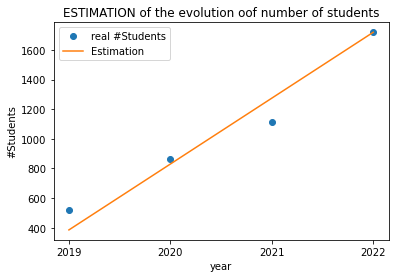

In [7]:
anos = np.append(anos,[2022])
y_22 = future.stimation_number(ano=2022)
alumnos = np.append(alumnos,[y_22])
plt.plot(anos,alumnos, 'o')
plt.title("ESTIMATION of the evolution oof number of students")
plt.xticks(np.arange(min(anos), max(anos)+1, 1.0))

t = np.linspace(min(anos),max(anos), 101)
y = future.stimation_number(ano=t)
plt.plot(t,y)

plt.xlabel("year")
plt.ylabel("#Students")
plt.legend(["real #Students","Estimation"])
plt.show()




---

## Comparing Dashboard

Now, we are going to create a big widget where we can compere the income of a month in several years. To use that I am going to use different widget so we can easyly choose which month we may compare.

First, what I need to create is the widgets. To create the widgets, we should know what are the different possibilities in the database so we would like to get the years in which we have data. From that we can create the wdgets.

In [8]:
import ipywidgets as wg
from IPython.display import display

mes = wg.FloatSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='MONTH:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)

ask = 'SELECT DISTINCT YEAR(created_at) as years FROM tiquet WHERE YEAR(created_at)>0 ORDER BY YEAR(created_at) DESC'

## I get the available years in the database
years = DB()
table = years.query(query = ask)
years_list = years.querylist(query = ask, column = 'years')
years_dic = years.querydict(query = ask)

vec =[]
for i in range(len(years_list)-1):
    vec.append( f"{years_list[i]}" )

    
## Once the vector with the years is create, we proceed with the widgets.

ano1 = wg.Dropdown(
    options= years_list,
    description='YEAR A:',
    disabled=False,
)

ano2 = wg.Dropdown(
    options=vec,
    description='YEAR B:',
    disabled=False,
)


Once I have the the widgets and the data ready, I need to prepare the function that works with the button that enables the comparison. In the next cell I prepare a button and it functionality so the task can be easily done.

In [9]:
button2 = wg.Button(
    description='Compare',
    disabled=False,
    button_style='primary',
    tooltip='Click me',
    icon='money' # (FontAwesome names without the `fa-` prefix)
)

out = wg.Output()


def action_of_button2(b):
        out.clear_output()
        ask = f" SELECT YEAR(created_at) as ano, MONTH(created_at), SUM(total) as total FROM tiquet WHERE MONTH(created_at)={mes.value} AND (YEAR(created_at)={ano1.value} OR YEAR(created_at)={ano2.value}) GROUP BY YEAR(created_at), MONTH(created_at) ORDER BY YEAR(created_at) ASC, MONTH(created_at) "
        students = DB()
        table = students.query(query = ask)
        dic = students.querydict(query = ask)

        with out:
            table
            if len(dic)>1:
                print(f"The {mes.value:.0f}/{ano1.value} had a turnover of {(table['total'][0]-table['total'][1]):.2f} € in comparison with {ano2.value}.")
            else:
                print("You might choose different years to compare.")
            
    
button2.on_click(action_of_button2)

print('Select the parameters:')
wg.VBox([wg.HBox([mes, ano1, ano2]),button2,out])



Select the parameters:


---

## Conclusion

This notebook can be quite powerfull for the managers of any academy that belongs to acakKER moreover if I finish with its development and implement many other funtionalities to analise data of the company. However, the objective that have been persued from the begining have been achived in this notebook.